In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

Import the required libraries and data 

In [63]:
!gdown 1XH29crmDjqpE1sPCUCffryF4FDbKVmjS

Downloading...
From: https://drive.google.com/uc?id=1XH29crmDjqpE1sPCUCffryF4FDbKVmjS
To: c:\Users\Lenovo\OneDrive\Documents\Python\CodingWise\ML\cars24-car-price-clean2.csv

  0%|          | 0.00/1.71M [00:00<?, ?B/s]
 31%|███       | 524k/1.71M [00:00<00:00, 1.82MB/s]
 92%|█████████▏| 1.57M/1.71M [00:00<00:00, 4.69MB/s]
100%|██████████| 1.71M/1.71M [00:00<00:00, 4.36MB/s]


Convert the data into a Pandas dataframe and view first few rows

In [64]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\train-cars24-car-price.csv')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


Understand the dimentionality of dataframe

In [65]:
df.shape

(13986, 11)

Fetching details of each column and understanding completeness of data 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13986 entries, 0 to 13985
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          13986 non-null  object 
 1   selling_price      13986 non-null  float64
 2   year               13986 non-null  float64
 3   seller_type        13986 non-null  object 
 4   km_driven          13986 non-null  int64  
 5   fuel_type          13986 non-null  object 
 6   transmission_type  13986 non-null  object 
 7   mileage            13986 non-null  float64
 8   engine             13986 non-null  float64
 9   max_power          13986 non-null  float64
 10  seats              13986 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


Comprehending the statistics of numerical columns

In [67]:
display(df.describe())

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.377749,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,9.368596,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


Below conclusions can be drawn from the data stats
- selling_price ranges from [0.33, 395] - the values seem to be in lakhs.
- mileage min is 0, max is 120 - need to check for outliers.
- engine min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

Check distribution of essential features to find any insights

<Axes: >

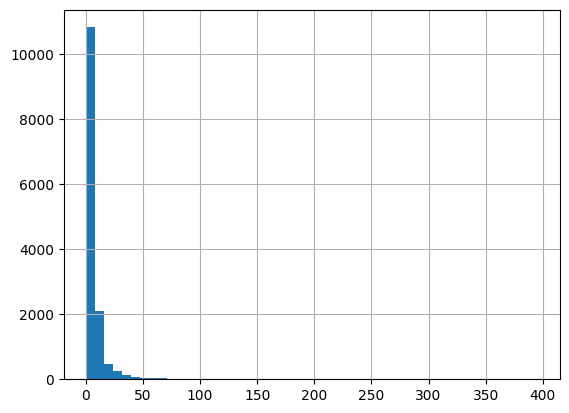

In [68]:
df['selling_price'].hist(bins=50)

From above plot it looks like price over a 100 (K) is an outlier. <br>Need to check the percentage of outliers.

In [69]:
(df.loc[df.selling_price > 100].shape[0] / df.shape[0]) * 100

0.06435006435006435

Since % of outliers are very very small, it will not affect our analysis. We can cap the outliers to a specific value (like 100)

In [70]:
df.loc[df.selling_price > 100, 'selling_price'] = 100

Plotting distribution of other features

<Axes: >

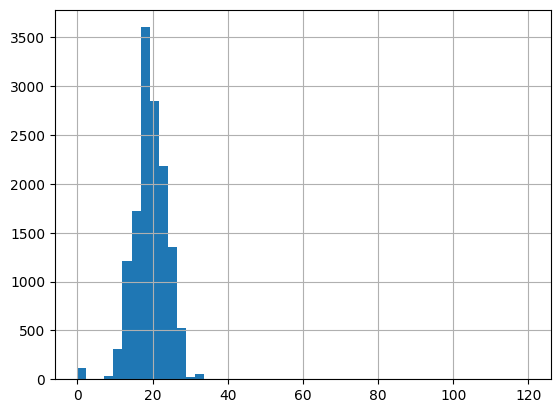

In [71]:
df["mileage"].hist(bins=50)

Plotting a density plot for the milage feature. <br>Density plot is similar to histogram, but with a more approximate shape. It tries to fit a suitable distribution over the histogram and hence includes points that might not even be present in data at hand.

<Axes: ylabel='Density'>

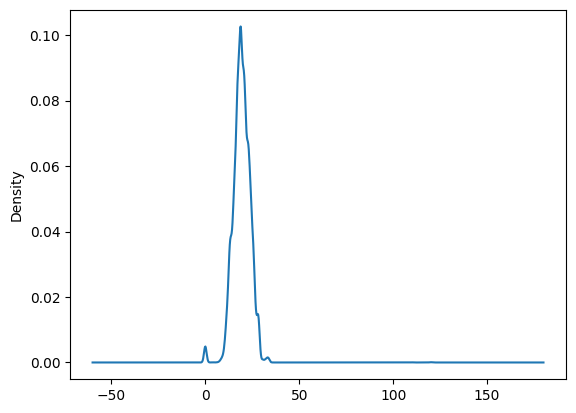

In [72]:
df["mileage"].plot.density()

From above plot it looks like a right skewed plot. Also mileage > 40 & milage < 0 looks like it might just be outliers.

In [73]:
df[df["mileage"]<=5].mileage.describe()         # analysing the peak seen at 0

count    119.000000
mean       0.033613
std        0.366679
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: mileage, dtype: float64

Looks like we just have a number of points with mileage 0. That does not make much sense as it cannot be a real value for car mileage.

In [74]:
df.loc[df.mileage == 0].shape[0] / df.shape[0] * 100        # Investigating % points with mileage=0

0.8437008437008438

In [75]:
df[df["mileage"] == 0.0].shape              # determining count of points where milage=0

(118, 11)

Thats a very small number of points. We can safely impute, or drop these points later during pre-processing

In [76]:
df[df["mileage"] > 40].mileage.describe()

count      3.000000
mean     116.666667
std        5.773503
min      110.000000
25%      115.000000
50%      120.000000
75%      120.000000
max      120.000000
Name: mileage, dtype: float64

In the density plot there was a significant point at mileage=40. After this there were only very few points and looked like outliers. Lets check them

In [77]:
df[df["mileage"] > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
4291,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0
4751,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
4894,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0


In [78]:
df[df["mileage"] > 40].fuel_type.value_counts()

fuel_type
Electric    3
Name: count, dtype: int64

From the above below points are clear
- So all vehicles with mileage > 40 are electric vehicles which makes sense.
- So they are not incorrect (error) values.
- Let us not remove these points for now

 Lets check at the correlations of numerical features with each other

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

ValueError: could not convert string to float: 'Maruti SX4 Zxi BSIII'

<Figure size 1000x800 with 0 Axes>

We see the following correlations:

- Engine and max-power
- Max power and selling price Now based on our domain knowledge about cars, we can assert these correlations. In this case, these correlations seem to make a lot of sense

Another visualisation we can check, is the scatter plot of each feature with the target. The pairplot from seaborn library can be used

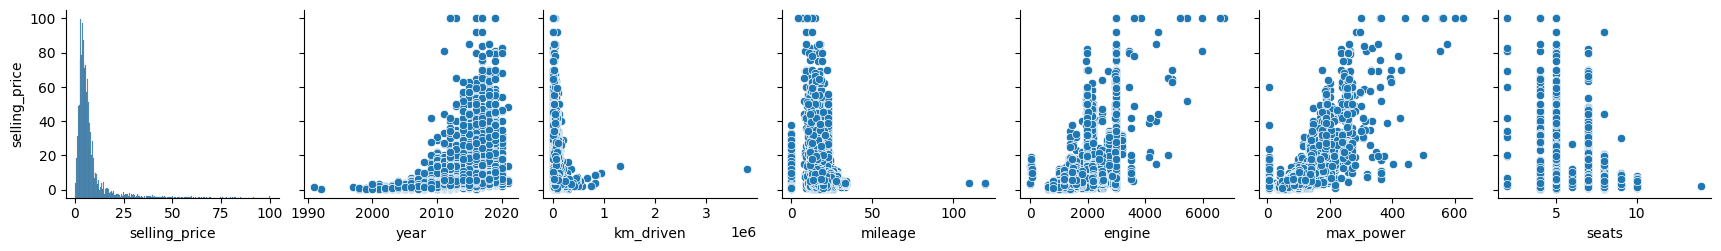

In [ ]:
sns.pairplot(df, y_vars=["selling_price"]);

In [ ]:
df['seats'].value_counts(normalize=True)

seats
5.0     0.837123
7.0     0.115902
8.0     0.022237
4.0     0.011440
6.0     0.007293
9.0     0.003432
10.0    0.001502
2.0     0.001001
14.0    0.000072
Name: proportion, dtype: float64

We need to split Make & Model of car from the full_name field

In [ ]:
df["make"] = df.full_name.apply(lambda x : x.split()[0])
df["model"] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
df = df.drop("full_name", axis=1)
df.head(2)

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.0,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.9,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi


Investigating each categorical variable seperately

In [ ]:
display(df.describe(include="object"))

,seller_type,fuel_type,transmission_type,make,model
count,13986,13986,13986,13986,13986
unique,3,5,2,41,2923
top,Dealer,Petrol,Manual,Maruti,Alto 800 LXI
freq,8393,6870,11251,3979,143


In [ ]:
df["fuel_type"].value_counts()

fuel_type
Petrol      6870
Diesel      6823
CNG          233
LPG           49
Electric      11
Name: count, dtype: int64

In [ ]:
df["transmission_type"].value_counts()

transmission_type
Manual       11251
Automatic     2735
Name: count, dtype: int64

In [ ]:
df["seller_type"].value_counts()

seller_type
Dealer              8393
Individual          5450
Trustmark Dealer     143
Name: count, dtype: int64

Plotting selling price based on different seller_type group

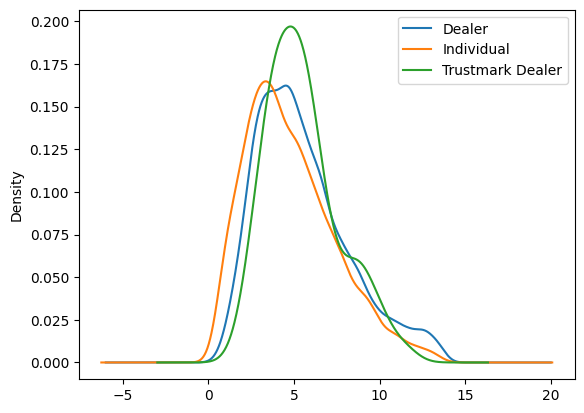

In [ ]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density();
plt.legend();

Looks like for different seller type, the selling price distrubution is not very different. <br>Hence one intuition that can be developed from this plot is that the seller_type variable will not turn out to be very important for the ML model.

Another way to visualise the same is to use a box-plot

Performing similar analysis for other categorical variables.

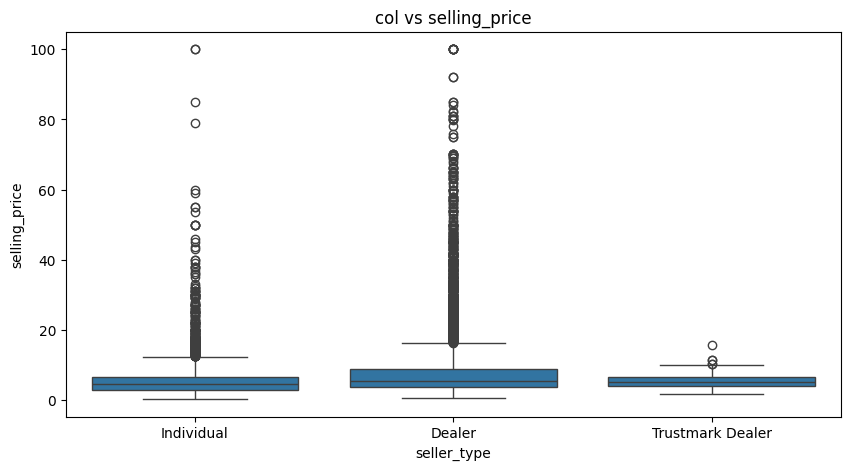

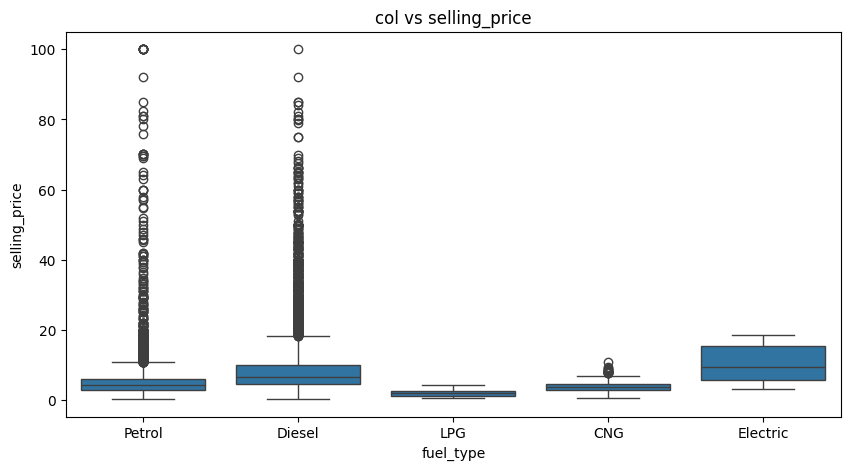

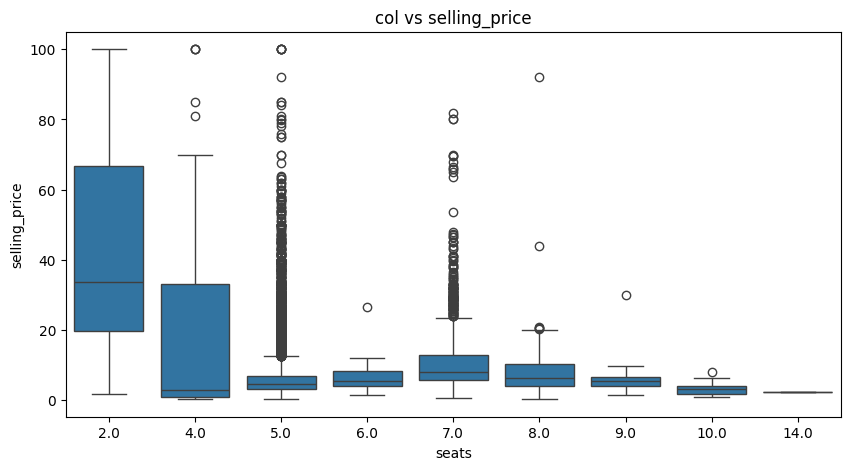

In [ ]:
for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

To transform the scale of selling-price for better visualisation

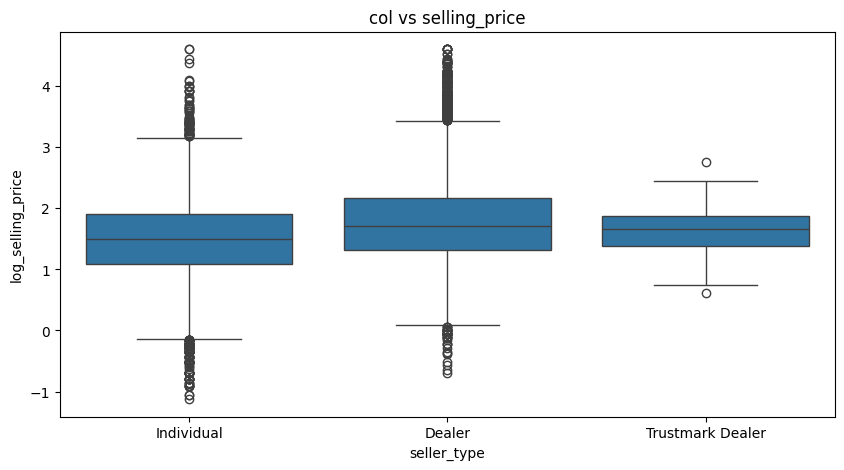

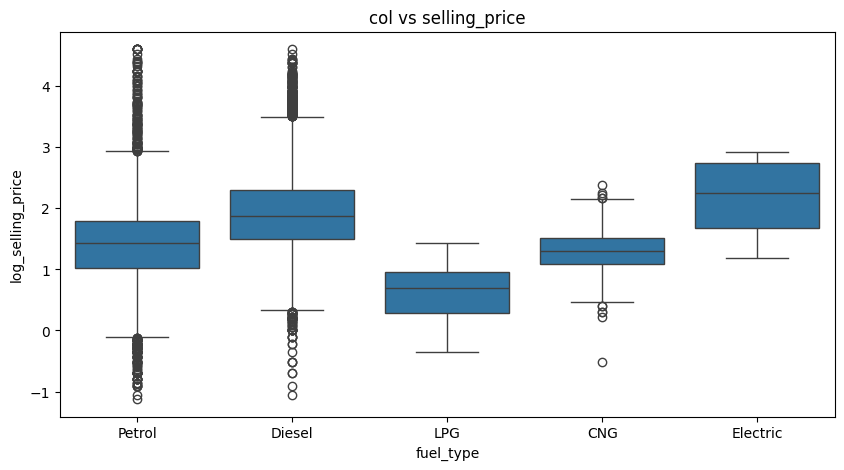

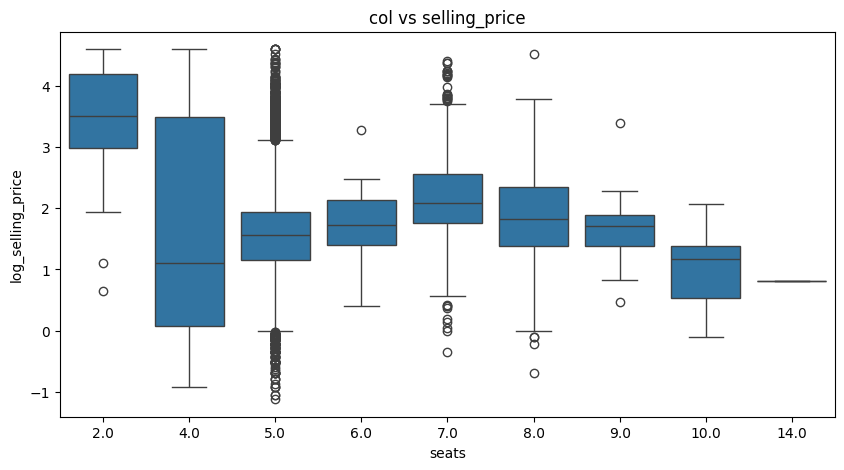

In [ ]:
df["log_selling_price"] = np.log(df["selling_price"].values)

for col in ['seller_type', 'fuel_type', 'seats']:
    plt.figure(figsize=(10,5))
    sns.boxplot(y='log_selling_price',x=col, data=df)
    plt.title('col vs selling_price')
    plt.show()

To count unique categories of "make" in the data

In [ ]:
len(df["make"].unique())

41

There are 41 car brands in the data - too many levels. Need to think of possible ways to encode them as numbers

 To see item counts for different "make"

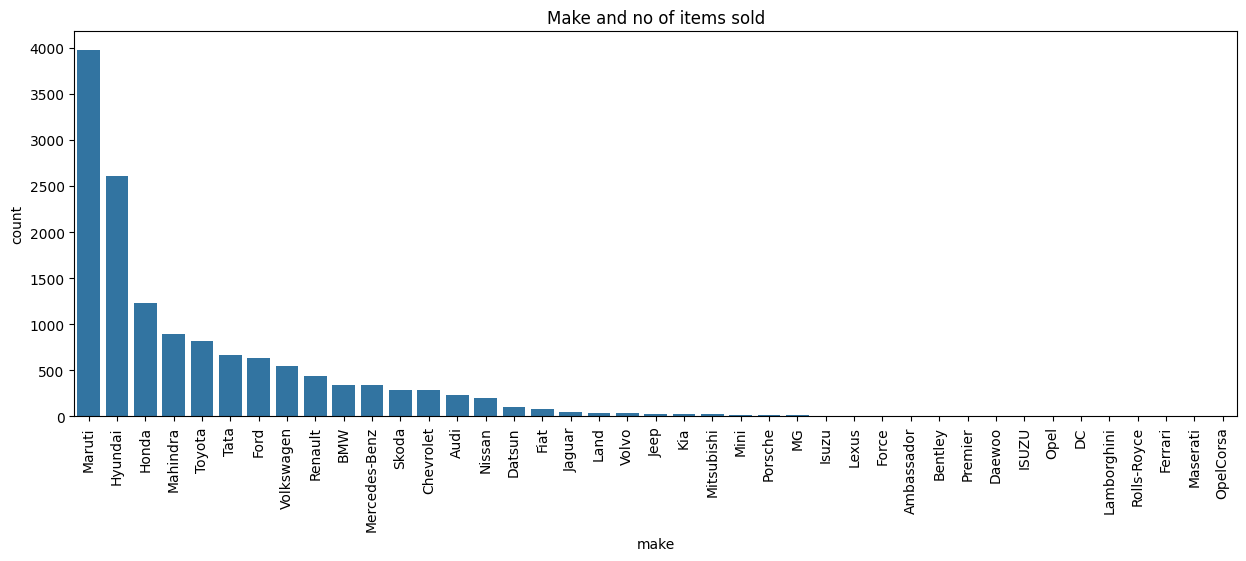

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90);
plt.title("Make and no of items sold")
plt.show()

To see how "make" is related to the selling price

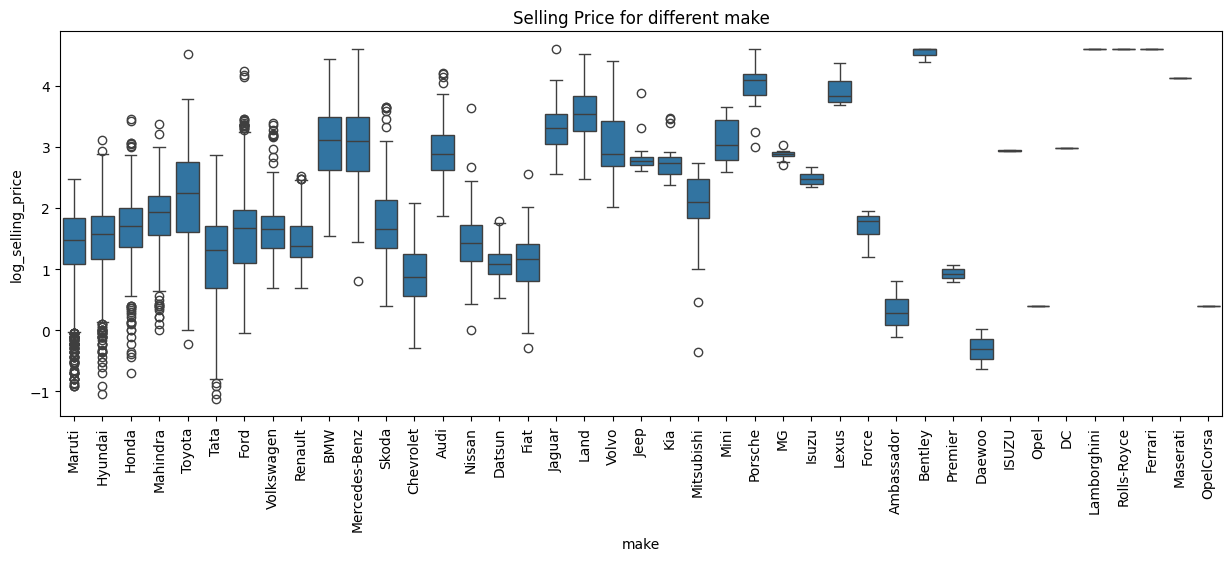

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y='log_selling_price',x='make', data=df, order = df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Selling Price for different make")
plt.show()

Dropping this unnecessary column

In [ ]:
df.drop("log_selling_price", axis=1, inplace=True)

In [ ]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


 Converting year to a more readable age

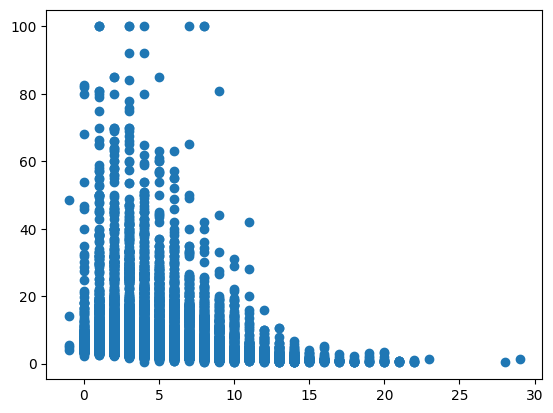

In [ ]:
current_year = 2020
age = current_year - df['year']
plt.scatter(age, df.selling_price)

To encode categorical variables for modelling

In [ ]:
# explains how two category variable can be encoded as a binary variable
transmission_dummy = pd.get_dummies(df["transmission_type"])
df = pd.concat([df, transmission_dummy], axis=1)
df = df.drop(["transmission_type", "Automatic"], axis=1)
df = df.rename(columns={"Manual": "transmission_type"})
df.sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
11990,9.3,2014.0,Individual,100000,Diesel,16.96,1968.0,138.03,5.0,Volkswagen,Jetta 2.0L TDI Highline AT,False
5764,17.0,2019.0,Individual,20000,Diesel,17.00,1956.0,138.10,5.0,Tata,Harrier XZ BSIV,True


In [ ]:
fuel_type_dummy = pd.get_dummies(df["fuel_type"], prefix="seats")
fuel_type_dummy.sample(frac=1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
4212,False,True,False,False,False
12063,False,False,False,False,True


 It seems fuel_type has 5 categories

 Removing 1 of the dummy variables to avoid the dummy variable trap

In [ ]:
fuel_type_dummy = fuel_type_dummy[fuel_type_dummy.columns[1:]]
fuel_type_dummy.head(2)

,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,False,False,False,True
1,True,False,False,False


In [ ]:
pd.concat([df, fuel_type_dummy], axis=1).sample(frac=1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
11623,5.9,2014.0,Individual,50000,Diesel,15.10,2179.0,140.00,7.0,Mahindra,XUV500 W6 2WD,True,True,False,False,False
13378,26.0,2016.0,Dealer,75000,Diesel,22.48,1995.0,187.74,5.0,BMW,5 Series 520d Luxury Line,False,True,False,False,False


In [ ]:
df.make.nunique()                           # checking unique categories for Make

AttributeError: 'DataFrame' object has no attribute 'make'

Here we have too many categories. We can merge categories as in 'seats' variable or we can try target encoding. Dummy encoding would make too many features with highly diluted information.

Hence trying the Target Encoding technique

In [ ]:
encoded_make = df.groupby('make')['selling_price'].transform('mean')

In [ ]:
show_df = df[['make']].copy()
show_df['encoded_make'] = encoded_make
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df.head()

41


,make,encoded_make
0,Maruti,4.648484
1,Hyundai,5.344764
3,Honda,5.911203
4,Volkswagen,5.632862
5,Toyota,11.179478


In [ ]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.327126,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,8.310745,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,100.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


Lets scale this data. We will use MinMaxScaler here

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(df[['selling_price', 'km_driven', 'mileage']])
scaled_values = scaler.transform(df[['selling_price', 'km_driven', 'mileage']])  # returns numpy.ndarray not df.
scaled_df = pd.DataFrame(scaled_values, columns=['selling_price', 'km_driven', 'mileage'])
scaled_df.head()

,selling_price,km_driven,mileage
0,0.025332,0.028922,0.125000
1,0.043893,0.018395,0.182500
2,0.049411,0.018395,0.210000
3,0.009280,0.023659,0.108333
4,0.043391,0.010763,0.137250


In [ ]:
scaled_df.describe()

,selling_price,km_driven,mileage
count,13986.000000,13986.000000,13986.000000
mean,0.070250,0.015231,0.161302
std,0.083378,0.014153,0.038655
min,0.000000,0.000000,0.000000
25%,0.030850,0.008132,0.140333
50%,0.047906,0.013448,0.159667
75%,0.074994,0.019442,0.186000
max,1.000000,1.000000,1.000000


In [ ]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'

def preprocess(df):
    df = df.loc[df.mileage != 0].copy()
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df

def feature_engineering(df):
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [ ]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Datasets\train-cars24-car-price.csv')
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.122128,0.517241,0.028922,0.094828,0.234893,0.160515,0.482759,0.179031,0.093108,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.211608,0.689655,0.018395,0.154310,0.206754,0.134879,0.310345,0.203759,0.200726,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.238210,0.793103,0.018395,0.182759,0.184834,0.111111,0.206897,0.179031,0.224184,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.044740,0.448276,0.023659,0.077586,0.198904,0.136876,0.551724,0.233432,0.087062,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.209190,0.793103,0.010763,0.107500,0.177429,0.111111,0.206897,0.218595,0.229504,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
df.shape

(13868, 18)

<Axes: >

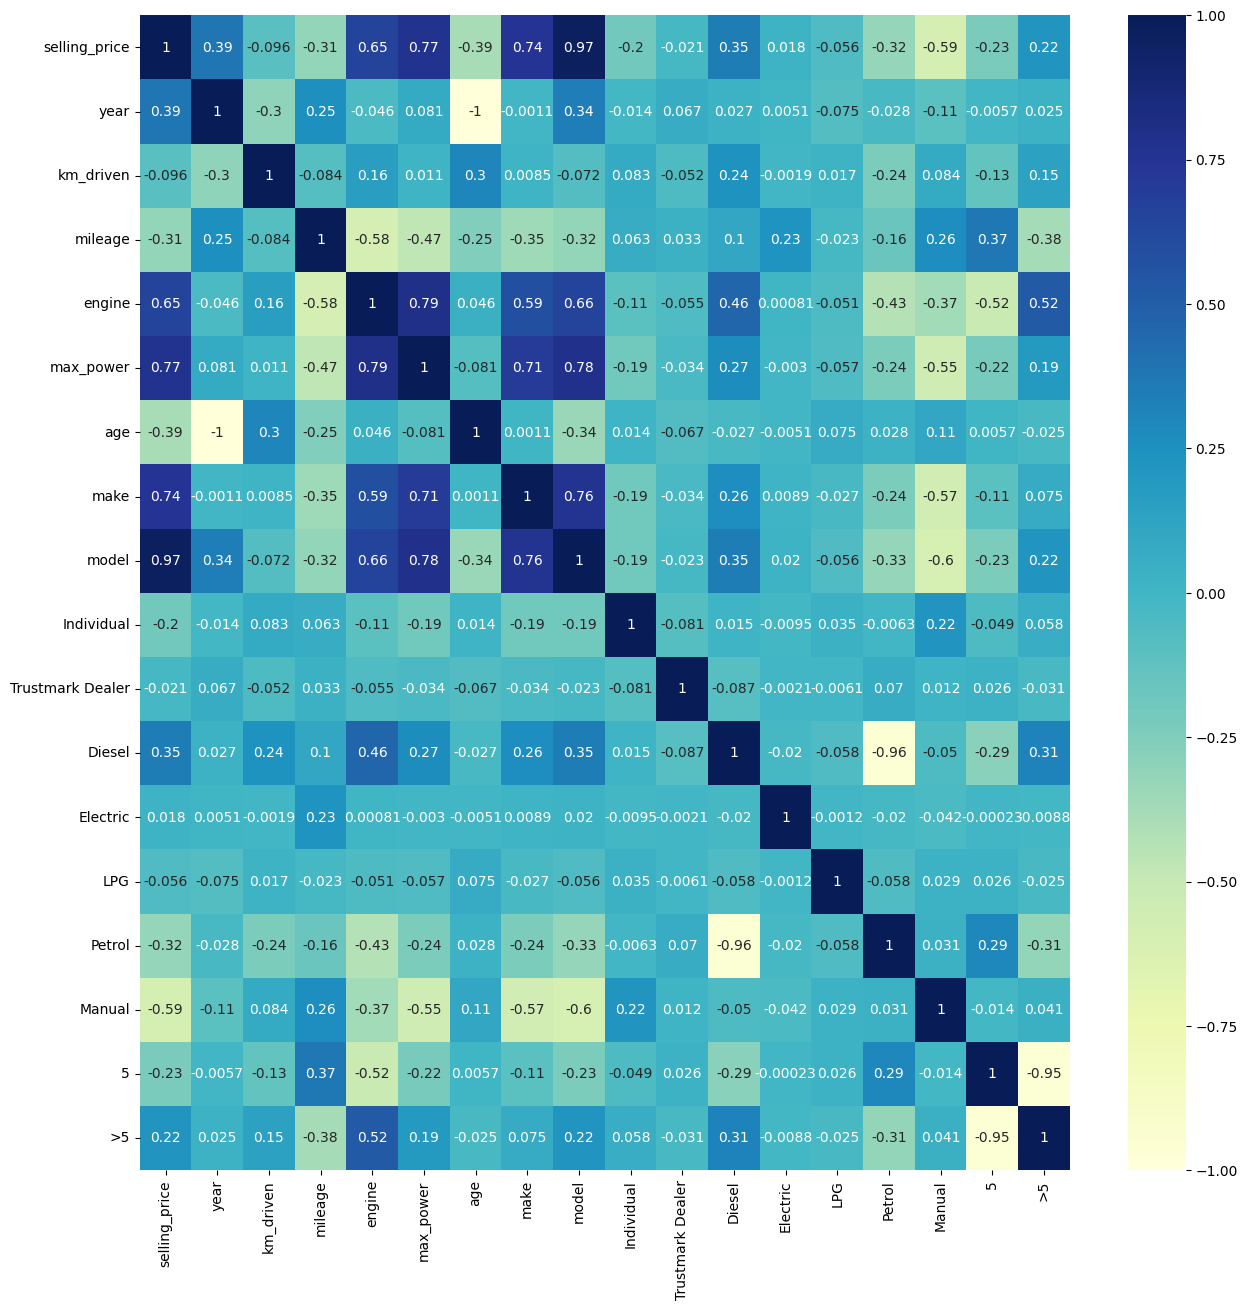

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)